# Days rental prediction
#### This is a popular project in DataCamp that ajims to apply different regression theqniques to predict the number of days a customer rents a DVD. This model is relevant to make more efficient the inventory planning.

####The data they provided is in the csv file rental_info.csv. It has the following features:

######"rental_date": The date (and time) the customer rents the DVD.
######""return_date": The date (and time) the customer returns the DVD.
######""amount": The amount paid by the customer for renting the DVD.
######""amount_2": The square of "amount".
######""rental_rate": The rate at which the DVD is rented for.
######""rental_rate_2": The square of "rental_rate".
######""release_year": The year the movie being rented was released.
######""length": Lenght of the movie being rented, in minuites.
######""length_2": The square of "length".
######""replacement_cost": The amount it will cost the company to replace the DVD.

#### The model should have an MSE below 3

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Reding the base
base = pd.read_csv("rental_info.csv")
base.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [3]:
#EDA

print(base.shape)
print(base.dtypes)
print(base.isnull().sum())

(15861, 15)
rental_date          object
return_date          object
amount              float64
release_year        float64
rental_rate         float64
length              float64
replacement_cost    float64
special_features     object
NC-17                 int64
PG                    int64
PG-13                 int64
R                     int64
amount_2            float64
length_2            float64
rental_rate_2       float64
dtype: object
rental_date         0
return_date         0
amount              0
release_year        0
rental_rate         0
length              0
replacement_cost    0
special_features    0
NC-17               0
PG                  0
PG-13               0
R                   0
amount_2            0
length_2            0
rental_rate_2       0
dtype: int64


###### Our dataset contains 15861 rows and 15 columns and there is not null values.

In [4]:
#Difference in days: target variable
base['return_date'] = pd.to_datetime(base['return_date'])
base['rental_date'] = pd.to_datetime(base['rental_date'])
base['days_rental'] = (base['return_date'] - base['rental_date']).dt.days
base.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,days_rental
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4


In [5]:
#Creating new features from "special_features" column as flags
base['flag_trailers'] = base['special_features'].str.contains("Trailers").astype(int)
base['flag_commentaries'] = base['special_features'].str.contains("Commentaries").astype(int)
base['flag_behind_scenes'] = base['special_features'].str.contains("Behind the").astype(int)
base['flag_deleted_scenes'] = base['special_features'].str.contains("Deleted Scenes").astype(int)

print(base.head())

                rental_date               return_date  amount  release_year  \
0 2005-05-25 02:54:33+00:00 2005-05-28 23:40:33+00:00    2.99        2005.0   
1 2005-06-15 23:19:16+00:00 2005-06-18 19:24:16+00:00    2.99        2005.0   
2 2005-07-10 04:27:45+00:00 2005-07-17 10:11:45+00:00    2.99        2005.0   
3 2005-07-31 12:06:41+00:00 2005-08-02 14:30:41+00:00    2.99        2005.0   
4 2005-08-19 12:30:04+00:00 2005-08-23 13:35:04+00:00    2.99        2005.0   

   rental_rate  length  replacement_cost                special_features  \
0         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
1         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
2         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
3         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   
4         2.99   126.0             16.99  {Trailers,"Behind the Scenes"}   

   NC-17  PG  PG-13  R  amount_2  length_2  rental_rate_2  days_rent

In [6]:
#Correlation analysis
numeric_columns = base.select_dtypes(include=['int', 'float'])

correlation_matrix = numeric_columns.corr()

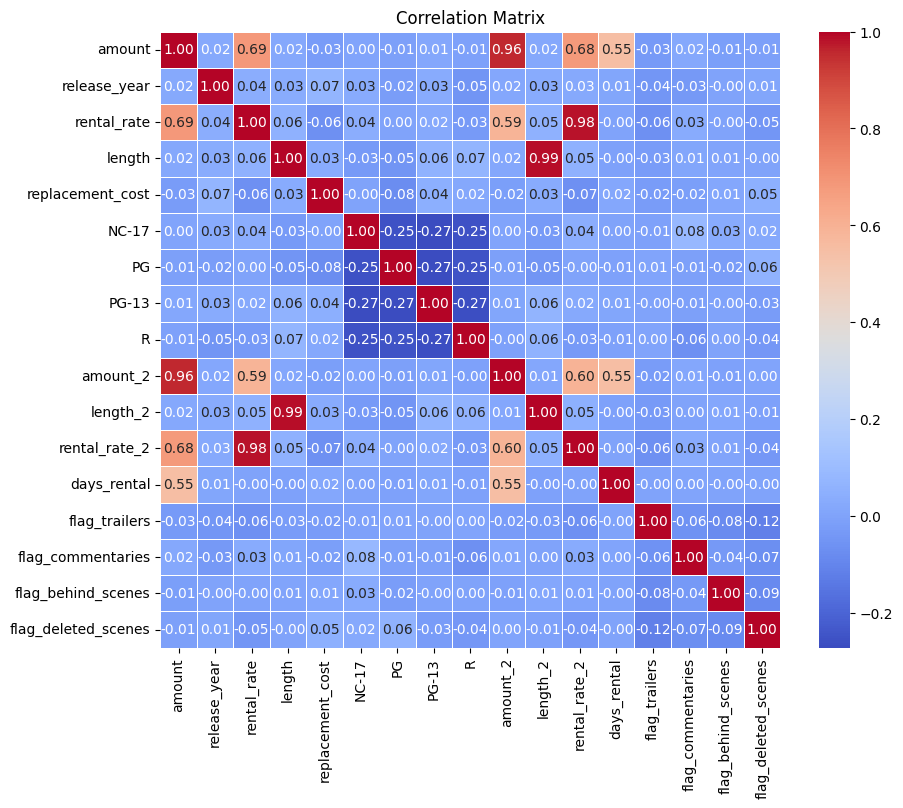

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation between:

days_rental - amount
rental_rate - amount


In [10]:
#x = base.drop(columns = ['rental_date', 'special_features', 'return_date', 'amount_2', 'length_2', 'rental_rate_2',
#                         'days_rental', 'flag_trailers', 'flag_commentaries', 'PG', 'R', 'PG-13', 'NC-17'])

x = base.drop(columns = ['rental_date', 'special_features', 'return_date', 'PG', 'R', 'PG-13', 'NC-17',
                         'days_rental'])

y = base['days_rental']

In [19]:
x.shape

(15861, 12)

In [11]:
### Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 2024)



In [28]:
#### Linear regression

x = base.drop(columns = ['rental_date', 'special_features', 'return_date', 'PG', 'R', 'PG-13', 'NC-17',
                         'days_rental', 'amount_2', 'length_2', 'rental_rate_2', 'length', 'replacement_cost',
                         'release_year', 'flag_commentaries'])

y = base['days_rental']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 2024)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict_lr = lr.predict(x_test)
mse_lr = MSE(y_predict_lr, y_test)
print(mse_lr)

# Get the coefficients
coefficients = lr.coef_

# Get the intercept
intercept = lr.intercept_

# Print the coefficients
print("Coefficients:")
for feature, coef in zip(x_train.columns, coefficients):
    print(f"{feature}: {coef}")

# Print the intercept
print("Intercept:", intercept)

2.929457869901428
Coefficients:
amount: 1.1654036756327726
rental_rate: -1.155124671228729
flag_trailers: -0.09487539547469791
flag_behind_scenes: 0.06009842053593852
flag_deleted_scenes: -0.13680281625590315
Intercept: 3.0921279176588863


In [12]:
x = base.drop(columns = ['rental_date', 'special_features', 'return_date', 'PG', 'R', 'PG-13', 'NC-17',
                         'days_rental'])

y = base['days_rental']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 2024)

dt = DecisionTreeRegressor(max_depth = 8,
                           min_samples_leaf = 0.1,
                           random_state = 2024)

dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
mse_dt = MSE(y_pred_dt, y_test)
print(mse_dt)

3.2572028182616353


In [13]:
### Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 4,
                           min_samples_leaf= 0.1,
                           random_state = 2024)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = MSE(y_pred_rf, y_test)
print(mse_rf)

3.8111718462645774


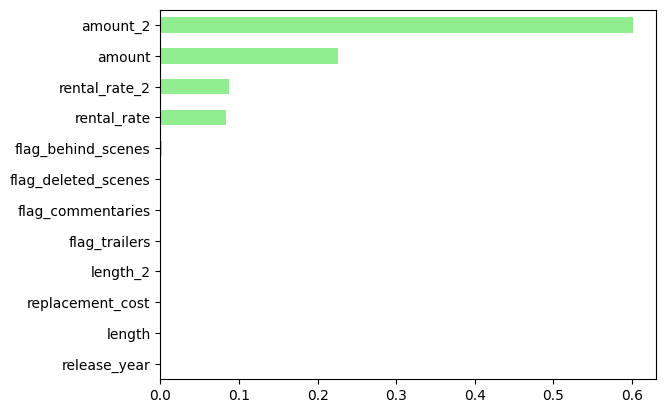

In [14]:
### Imortance feature
importances_rf = pd.Series(rf.feature_importances_, index = x.columns).sort_values()
importances_rf.plot(kind = 'barh', color = 'lightgreen');plt.show()


In [20]:
from sklearn.linear_model import Lasso
scores_lasso = []
for alpha in [0.01, 0.1, 5, 10, 50]:
  lasso = Lasso(alpha = alpha)
  lasso.fit(x_train, y_train)
  lasso_pred = lasso.predict(x_test)
  scores_lasso.append(lasso.score(x_test, y_test))
print(scores_lasso)

[0.57768078847497, 0.5604976799429684, 0.3803340570902065, 0.27857895086662565, -8.884294404265525e-05]


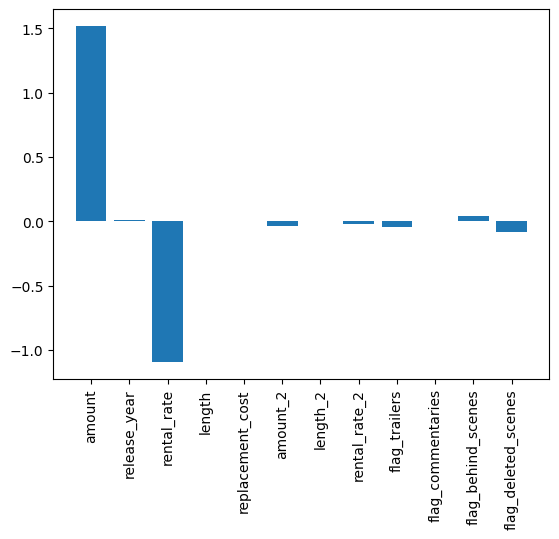

In [21]:
#Feature selection using lasso
names = x.columns
lasso = Lasso(alpha = 0.01)
lasso_coef = lasso.fit(x,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
params_rf = {
    'n_estimators' : [2,3,4,5,6],
    'max_depth' : [2,3,4,5],
    'min_samples_leaf' : [0.03, 0.04, 0.05, 0.06, 0.1],
    'max_features' : ['log2', 'sqrt']
}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=4,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(x_train, y_train)
best_hp_gridrf = grid_rf.best_params_
print(best_hp_gridrf)
best_model = grid_rf.best_estimator_
y_pred_grid_rf = best_model.predict(x_test)
print(MSE(y_test, y_pred_grid_rf))

Fitting 4 folds for each of 200 candidates, totalling 800 fits
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.03, 'n_estimators': 2}
3.4739864571394077


In [18]:
from sklearn.model_selection import GridSearchCV
params_dt = {
    'max_depth' : [2,3,4,5,6],
    'min_samples_leaf' : [0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2],
}

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       cv=4,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

grid_dt.fit(x_train, y_train)
best_hp_griddt = grid_rf.best_params_
print(best_hp_griddt)
best_model_dt = grid_dt.best_estimator_
y_pred_grid_dt = best_model_dt.predict(x_test)
print(MSE(y_test, y_pred_grid_dt))

Fitting 4 folds for each of 35 candidates, totalling 140 fits
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.03, 'n_estimators': 2}
2.495758989474803


## Conclutions

###### 1. There are some interesting correlations between rental_rate and amount, and also between the target variable (days_rental) with amount_2 variable.

##### 2. Linear regression is a good model to predict days rental, with a MSE = 2.93 and using just five variables.

##### 3. Simple Tree-based models (decision tree and random forest) did not performed good enough this problem because of the MSE > 3 obtained. Also importance models from RF show that most important variables are amount and rental rate.

##### 4. Using hyperparameter tuning with decision tree as an estimator, the MSE was optinized up to 2.46, being the best performance comparing all models trained.

##### 5. Although the bes model according to MSE is the decisio tree with a cross validation, linear regression uses much less variables and gives us more explaniability, sacrifying some accuracy, and for a future implementation this could be relevant.